## Car Price Prediction Data Analysis Project

The project aimed to identify the key determinants of car prices and assess their relative impact, enabling better understanding and decision-making within the automotive industry.

### Methodology
- **Data Cleaning**: The dataset was carefully cleaned to handle missing values, data type formats, data trasformation and getting the dummy variable for categorical variable. Any necessary preprocessing steps were performed to ensure data quality.
- **Exploratory Data Analysis**: Exploratory data analysis techniques were applied to gain insights into the relationships between car prices and various features. Visualizations, statistical summaries, and correlation analysis were used to understand the data better.
- **Multiple Regression Model**: A multiple regression model was developed to predict car prices. model evaluation was used to show the distribution of Actual vs Fitted Values for Price. 

### Key Findings

- Engine Size, Horsepower  and Curb-weight were found to have the most significant influence on car prices.
- Certain vehicle features, highway-mpg and length, exhibited a stronger correlation with prices than initially anticipated.
- the model achieved R-squared value of 82 percent (82%)  which means that approximately 82 percent of the variability in the dependent variable (price) can be explained by the independent variables (x) included in the multiple linear regression model.
- the distribution plot shows that the fitted values are reasonably close to the actual values since the two distributions overlap a bit




### Data Source

The dataset used in this analysis was obtained from https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
- Data type : CSV
- Headers information  is available at: https://archive.ics.uci.edu/dataset/10/automobile
- Citation: Schlimmer,Jeffrey. (1987). Automobile. UCI Machine Learning Repository. https://doi.org/10.24432/C5B01C.


## Dataset Description

The dataset used in this analysis contains information about automobiles. It includes the following columns:

- **symboling**: The insurance risk rating assigned to the vehicle.
- **normalized-losses**: The average loss payment per insured vehicle year, normalized to a scale of 100.
- **make**: The manufacturer or brand of the automobile.
- **fuel-type**: The type of fuel the vehicle uses (gasoline or diesel).
- **aspiration**: The type of air intake system used by the engine (naturally aspirated or forced induction).
- **num-of-doors**: The number of doors on the vehicle (two or four).
- **body-style**: The body configuration or style of the vehicle (sedan, hatchback, convertible, etc.).
- **drive-wheels**: The type of wheels that provide power to the vehicle (front-wheel drive, rear-wheel drive, or all-wheel drive).
- **engine-location**: The location of the engine within the vehicle (front or rear).
- **wheel-base**: The distance between the centers of the front and rear wheels.
- **length**: The length of the vehicle.
- **width**: The width of the vehicle.
- **height**: The height of the vehicle.
- **curb-weight**: The weight of the vehicle without occupants or cargo.
- **engine-type**: The configuration or design of the engine.
- **num-of-cylinders**: The number of cylinders in the engine.
- **engine-size**: The total volume of all cylinders in the engine.
- **fuel-system**: The type of fuel delivery system used by the engine.
- **bore**: The diameter of the engine's cylinders.
- **stroke**: The length of the piston stroke.
- **compression-ratio**: The compression ratio of the engine.
- **horsepower**: The power output of the engine.
- **peak-rpm**: The engine's rotational speed at maximum power.
- **city-mpg**: The fuel efficiency in miles per gallon for city driving conditions.
- **highway-mpg**: The fuel efficiency in miles per gallon for highway driving conditions.
- **price**: The price of the vehicle.

This dataset provides valuable information about various automobile attributes, enabling insightful analysis and modeling within the automotive domain.


In [2]:
import pandas as pd
df = pd.read_csv("auto.csv", header=None)
pd.set_option('display.max_columns', None)

In [3]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
           "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
           "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
           "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = headers
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# import numpy to handle "?"
import numpy as np
df.replace("?", np.NaN, inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
# handling missing values 
# dropping missing values 
"""since we are trying to predict the price of cars 
it is required to delete missing values in the price column"""
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

# deal the missing data 
# replace  continous variable clolumn by column average 
average_normalized_losses = df["normalized-losses"].astype(float).mean(axis=0)
df["normalized-losses"].replace(np.NaN, average_normalized_losses, inplace=True)

avg_bores = df["bore"].astype(float).mean(axis=0)
df["bore"].replace(np.NaN, avg_bores, inplace=True)

avg_strokes = df["stroke"].astype(float).mean(axis=0)
df["stroke"].replace(np.NaN, avg_strokes, inplace=True)

avg_horsepower = df["horsepower"].astype(float).mean(axis=0)
df["horsepower"].replace(np.NaN, avg_horsepower, inplace=True)

avg_peak = df["peak-rpm"].astype(float).mean(axis=0)
df["peak-rpm"].replace(np.NaN, avg_peak, inplace=True)

"""number of doors column is a caterogorial variable
so we use a different approach"""
# first we check the value counts in the column(num-of-door)

print(df["num-of-doors"].value_counts())

four    113
two      86
Name: num-of-doors, dtype: int64


In [7]:
# we then replace by the maximum count(four)
print(df['num-of-doors'].value_counts().idxmax())
df["num-of-doors"].replace(np.NaN, "four", inplace=True)

four


In [8]:
# check if their if our data is not having any missing value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [9]:
# check the data format
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
# some columns are not of the correct data type 
# convert data types to correct format 
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df["normalized-losses"] = df["normalized-losses"].astype("int")
df["price"] = df["price"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
df["horsepower"] = df["horsepower"].astype("int")

In [11]:
# normalize the data
# normalize width, height and lenght
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()
df['length'] = df['length'] / df['length'].max()


In [12]:
# data binning
# binning using the linespace funcrtion
# binning the horsepower column into 3 categories (low, medim and high)
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

# we set group names
group_names = ['Low', 'Medium', 'High']

# We apply the function "cut" to determine what each value of `df['horsepower']` belongs to
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [13]:
# getting dummy variiables 
#convert the fuel-type column into dummy variable 
get_dummy_variable_1 = pd.get_dummies(df["fuel-type"])
get_dummy_variable_1.head(5)


,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [14]:
get_dummy_variable_1.rename(columns={'diesel': 'fuel-type-diesel', 'gas': 'fuel-type-gas'}, inplace=True)
df = pd.concat([df, get_dummy_variable_1], axis=1)
df.drop('fuel-type', axis=1, inplace=True)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,Low,0,1


In [15]:
""" Exploratory data analysis """
df.corr()['price'].sort_values()


C:\Users\PC\AppData\Local\Temp\ipykernel_12484\44749578.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


highway-mpg         -0.704692
city-mpg            -0.686571
fuel-type-gas       -0.110326
peak-rpm            -0.101542
symboling           -0.082391
compression-ratio    0.071107
stroke               0.082267
fuel-type-diesel     0.110326
normalized-losses    0.133999
height               0.135486
bore                 0.543154
wheel-base           0.584642
length               0.690628
width                0.751265
horsepower           0.809729
curb-weight          0.834415
engine-size          0.872335
price                1.000000
Name: price, dtype: float64

In [21]:
df.to_csv("clean_df.csv", index=False)


<Axes: xlabel='highway-mpg', ylabel='price'>

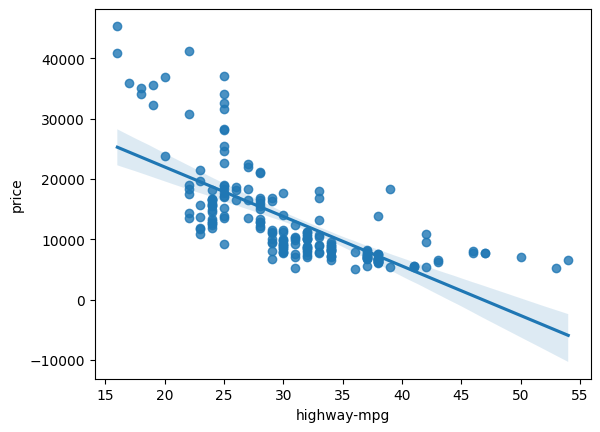

In [93]:
# plot regression plot of variables with high correlation
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

# regplot of highway-mpg and price
sns.regplot(x='highway-mpg',y='price', data=df)


As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price. A negative correlation between highway-mpg and price suggests that vehicles with higher fuel efficiency (higher highway-mpg) generally have lower prices, while vehicles with lower fuel efficiency (lower highway-mpg) tend to have higher prices.

<Axes: xlabel='city-mpg', ylabel='price'>

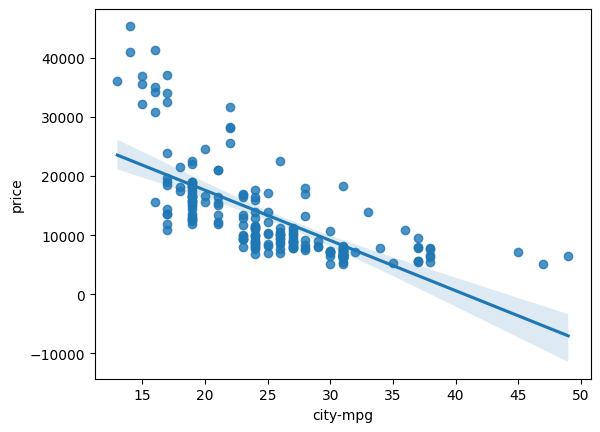

In [94]:
# regplot of city-mpg and price
sns.regplot(x='city-mpg',y='price',data=df)

The plot above shows that as city-mpg increases, the price goes down indicating a negative relationship. Negative correlation between city-mpg and price suggests that vehicles with higher fuel efficiency in city driving conditions (higher city-mpg) generally have lower prices, while vehicles with lower fuel efficiency (lower city-mpg) tend to have higher prices.


<Axes: xlabel='bore', ylabel='price'>

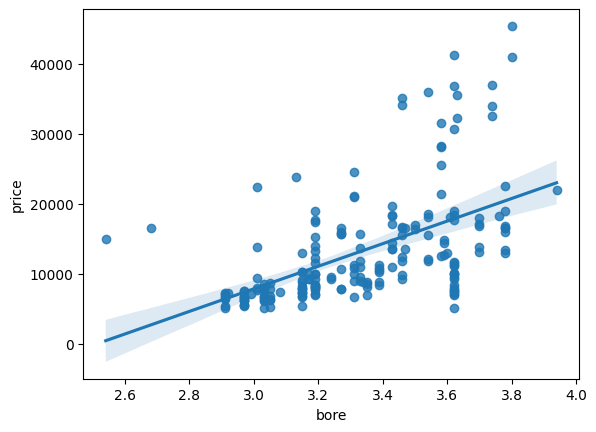

In [95]:
# regplot of bore and price 
sns.regplot(x='bore', y='price', data=df)

The plot shows that as bore increases, the price also increases. This indicates a positive relationship. When "bore" has a positive correlation with price, it suggests that car buyers are willing to pay a premium for vehicles equipped with larger bore sizes and the associated performance benefits.


<Axes: xlabel='wheel-base', ylabel='price'>

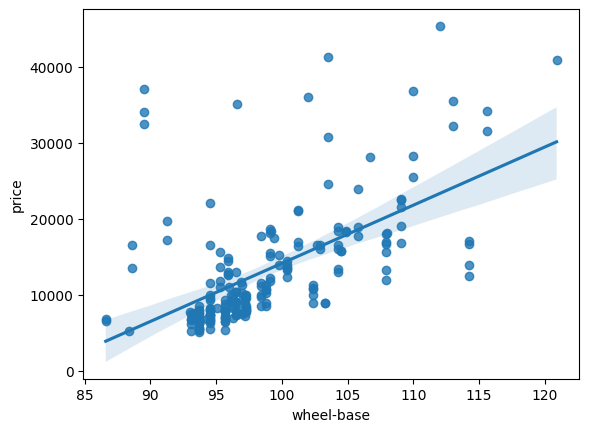

In [96]:
# regplot of wheel-base and price 
sns.regplot(x=df['wheel-base'],y=df['price'])

This shows that as wheel-base increases, the price also increases, which indicates a positive relationship. When "wheel base" has a positive correlation with price, it suggests that car buyers are willing to pay a premium for vehicles with larger wheel bases. This may be due to the perceived benefits of a roomier interior, improved handling, and overall comfort provided by a longer wheel base.

<Axes: xlabel='length', ylabel='price'>

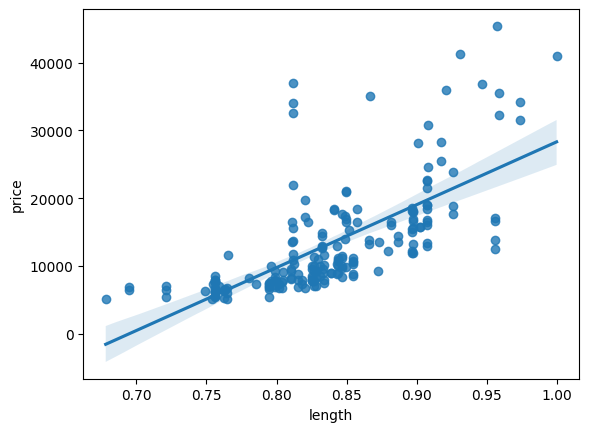

In [97]:
# regplot of length and price 
sns.regplot(x='length',y='price',data=df)

The plot shows a positive relationship. As the length increases, the price also increases. It suggests that car buyers are willing to pay more for vehicles with longer lengths. Longer vehicles are often perceived as offering more comfort, storage space, and potentially superior driving experiences, leading to an increase in their market value.

<Axes: xlabel='width', ylabel='price'>

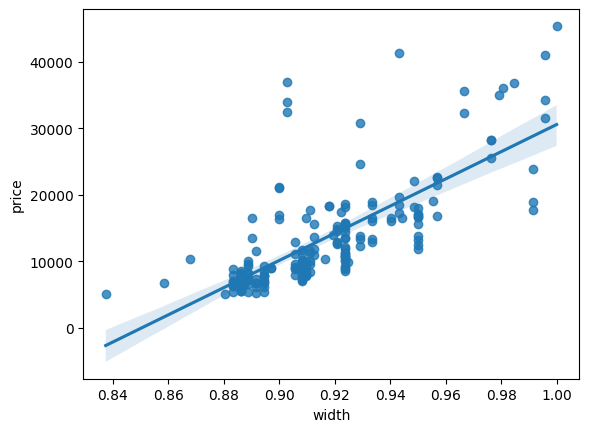

In [98]:
# regplot for width and price 
sns.regplot(x='width', y='price',data=df)

The plot shows a positive relationship between width and price. it suggests that car buyers are willing to pay a premium for vehicles with greater width. A wider vehicle can offer more room for passengers, increased cargo capacity, and potentially a more substantial presence on the road. These factors contribute to the perceived value and desirability of wider vehicles, resulting in higher prices.

<Axes: xlabel='horsepower', ylabel='price'>

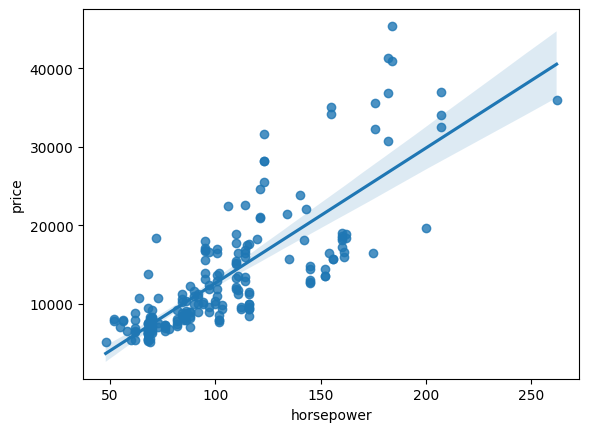

In [99]:
# regplot of horsepower and price 
sns.regplot(x='horsepower',y='price',data=df)

As the horsepower goes up, the price goes up: this indicates a positive direct correlation between these two variables.
Horsepower seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line. it suggests that car buyers are willing to pay a premium for vehicles with higher power outputs. Higher horsepower engines often require advanced technologies, larger or more efficient components, and increased engineering efforts, resulting in higher production costs. These costs are typically reflected in the pricing of vehicles with higher horsepower.

<Axes: xlabel='curb-weight', ylabel='price'>

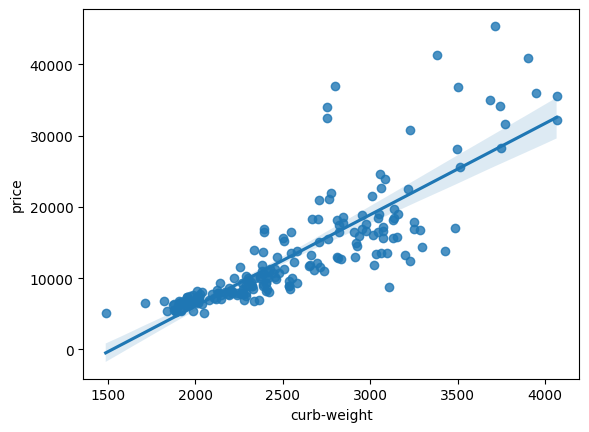

In [100]:
# regplot for curb-weight and price
sns.regplot(x='curb-weight',y='price',data=df)

curb-weight shows a strong positive relationshipo between curb-weight and price . When "curb weight" has a positive relationship with price, it suggests that car buyers are willing to pay more for vehicles with heavier curb weights. Heavier vehicles often offer benefits such as enhanced stability, increased safety features, and potentially improved ride quality. These factors contribute to the perceived value and desirability of vehicles with higher curb weights, leading to higher prices.

<Axes: xlabel='engine-size', ylabel='price'>

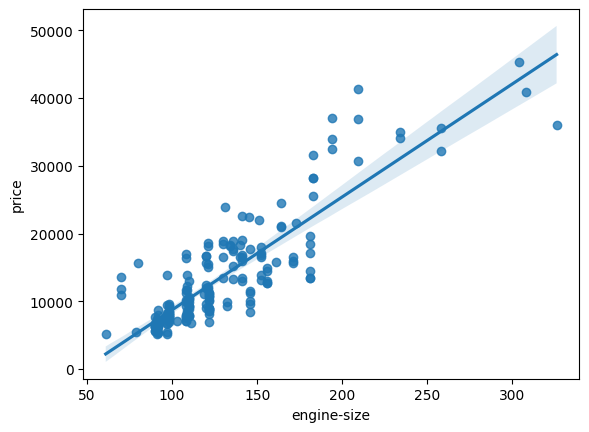

In [101]:
# regplot of engine-size and price 
sns.regplot(x='engine-size',y='price',data=df)

As the engine-size goes up, the price goes up. This indicates a positive direct correlation between these two variables. It suggests that car buyers are willing to pay a premium for vehicles with larger engine sizes. Vehicles with larger engines typically require more advanced technologies, increased manufacturing costs, and potentially higher levels of engineering expertise. These factors contribute to the higher prices associated with vehicles featuring larger engine sizes

Text(0.5, 1.0, 'horsepower bins')

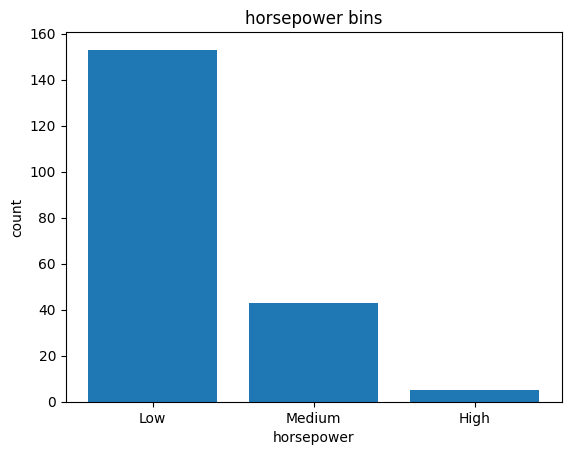

In [102]:
# let's plot the distribution of each plot 
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [103]:
# visualizing categorical vatiables
cylinder_count=df['num-of-cylinders'].value_counts().to_frame()
cylinder_count.rename(columns={'num-of-cylinders':'values'},inplace=True)
cylinder_count.index.name = 'num-of-cylinders'
cylinder_count

,values
num-of-cylinders,
four,157
six,24
five,10
two,4
eight,4
three,1
twelve,1


<Axes: xlabel='num-of-cylinders', ylabel='price'>

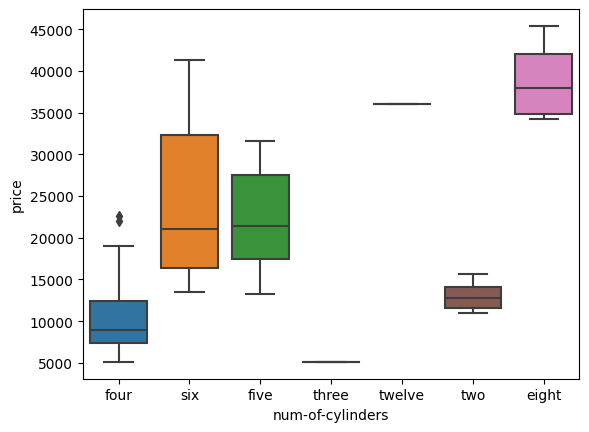

In [104]:
# using boxplot to show the relationship between number-of-cylinders and price
sns.boxplot(x='num-of-cylinders',y='price',data=df)

In [105]:
# engine location count
eng_loc_count=df['engine-location'].value_counts().to_frame()
eng_loc_count.rename(columns={'engine-location':'values'},inplace=True)
eng_loc_count.index.name = 'engine-location'
eng_loc_count


,values
engine-location,
front,198
rear,3


In [106]:
# horsepower-binned count
h_power=df['horsepower-binned'].value_counts().to_frame()
h_power.rename(columns={'horsepower-binned':'values'},inplace=True)
h_power.index.name = 'horsepower-binned'
h_power

,values
horsepower-binned,
Low,153
Medium,43
High,5


<Axes: xlabel='engine-location', ylabel='price'>

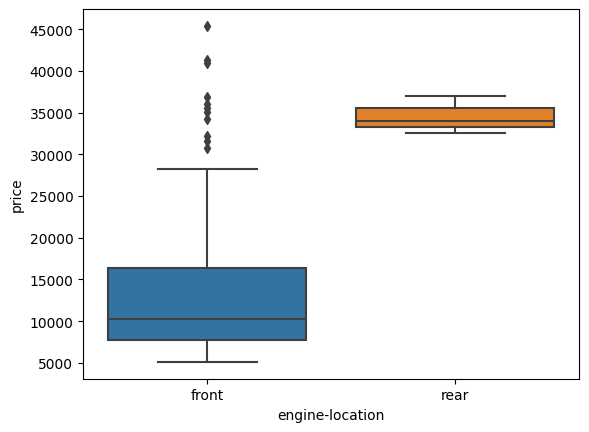

In [107]:
# visualizing the relationship between engine location and price
sns.boxplot(x='engine-location',y='price',data=df)

In [108]:
# body-style counts 
df["body-style"].value_counts().to_frame()
body_counts = df["body-style"].value_counts().to_frame()
body_counts.rename(columns={'body-style':'value_count'},inplace=True)
body_counts.index.name = "body-style"
body_counts

,value_count
body-style,
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


<Axes: xlabel='body-style', ylabel='price'>

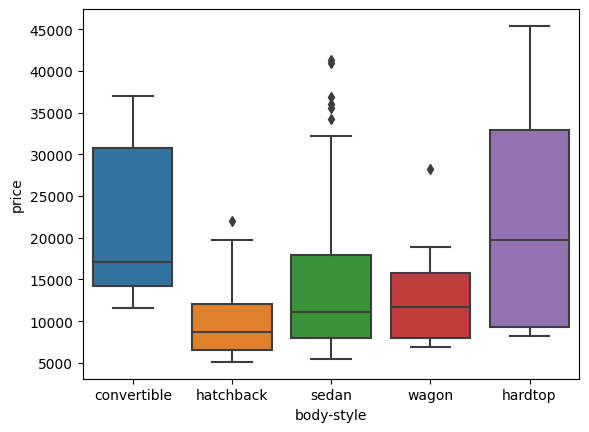

In [109]:
# visulizing body count and price
sns.boxplot(x='body-style',y='price',data=df)

In [110]:
""" grouping data """
# grouping of num-of-cylinders
group_one = df[['num-of-cylinders','price']]
grouping=group_one.groupby(['num-of-cylinders'], as_index=False).mean()
grouping

,num-of-cylinders,price
0,eight,38900.000000
1,five,22007.600000
2,four,10303.197452
3,six,23671.833333
4,three,5151.000000
5,twelve,36000.000000
6,two,13020.000000


In [111]:
# grouping of drive-wheels and price
group_two = df[['drive-wheels','price']]
grouping=group_two.groupby(['drive-wheels'], as_index=False).mean()
grouping

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [112]:
# grouping of engine-location
group_three = df[['engine-location','price']]
grouping=group_three.groupby(['engine-location'], as_index=False).mean()
grouping

,engine-location,price
0,front,12884.085859
1,rear,34528.000000


In [113]:
# Multiple grouping 
# grouping of body-style and engine loction
group_four = df[['drive-wheels','body-style','price']]
grouping = group_four.groupby(['drive-wheels','body-style'], as_index=False).mean()
grouping


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [114]:
# convert the multiple groups to a pivot table 
grouped_pivot = grouping.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

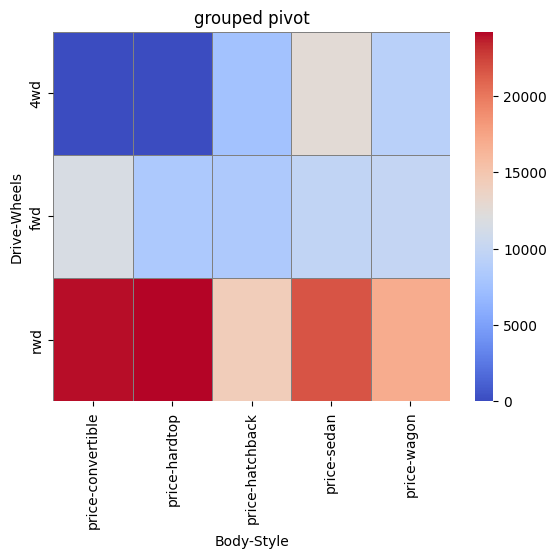

In [132]:
""" Let's use a heat map to visualize the relationship between 
body-style, drive-wheels and price """
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(grouped_pivot, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title('grouped pivot')
plt.xlabel('Body-Style')
plt.ylabel('Drive-Wheels')
plt.show()



In [131]:
""" pearson correlation of the variables and their corresponding p vaues """
# import scipy
from scipy import stats
# wheel base vs price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732947e-20


since the p-value < 0.001, the relationship between wheel-base and price is statistically significant and the coefficient of about 0.58 shows that the relationship is positive and moderately strong

In [117]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.8097290352560285  with a P-value of P =  5.92400102759337e-48


since the p-value < 0.001, the relationship between horsepower and price is statistically significant and the coefficient of about 0.81 shows that the relationship is positive and very strong

In [118]:
# lenght vs price 
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.016477466159153e-30


since the p-value < 0.001, the relationship between length and price is statistically significant and the coefficient of about 0.69 shows that the relationship is positive and quite strong

In [119]:
# width vs price 
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7512653440522672  with a P-value of P = 9.200335510482065e-38


since the p-value < 0.001, the relationship between wwidth and price is statistically significant and the coefficient of about 0.75 shows that the relationship is positive and strong

In [120]:
# curb-weight vs price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893972e-53


since the p-value < 0.001, the relationship between curb-weight and price is statistically significant and the coefficient of about 0.83 shows that the relationship is positive and very strong

In [121]:
# engine size vs price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200262e-64


since the p-value < 0.001, the relationship between engine-size and price is statistically significant and the coefficient of about 0.87 shows that the relationship is positive and extremely strong

In [122]:
# bore vs price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431537659807734  with a P-value of P =   8.051208825441073e-17


since the p-value < 0.001, the relationship between bore and price is statistically significant and the coefficient of about 0.54 shows that the relationship is positive and  moderately strong

In [123]:
# city-mpg vs price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567512e-29


since the p-value < 0.001, the relationship between city-mpg and price is statistically significant and the coefficient of about -0.69 shows that the relationship is negative and  quite strong

In [124]:
# highway-mpg vs price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144475452e-31


since the p-value < 0.001, the relationship between highway-mpg and price is statistically significant and the coefficient of about -0.70 shows that the relationship is positive and quite strong

In [125]:
""" Model developement """
# using multiple linear regression to predict price 
# import linear regression modules
from sklearn.linear_model import LinearRegression
x = df[['horsepower', 'curb-weight', 'engine-size', 'width']]
y = df['price'] 
lm=LinearRegression()
lm.fit(x,y)
yhat=lm.predict(x)
yhat[0:5]

array([12729.19229073, 12729.19229073, 18293.30459635, 11409.47424344,
       15455.89289274])

In [126]:
# model evaluation
# R squared of multiple linear regression model
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.815997664586656


the model achieved R-squared value of 82 percent (82%) which means that approximately 82 percent of the variability in the dependent variable (price) can be explained by the independent variables (x) included in the multiple linear regression model.

In [127]:
# model evaluation
# MSE of multiple linear regression model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  11563011.312031945


C:\Users\PC\AppData\Local\Temp\ipykernel_10256\1915218635.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\PC\AppData\Local\Temp\ipykernel_10256\1915218635.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

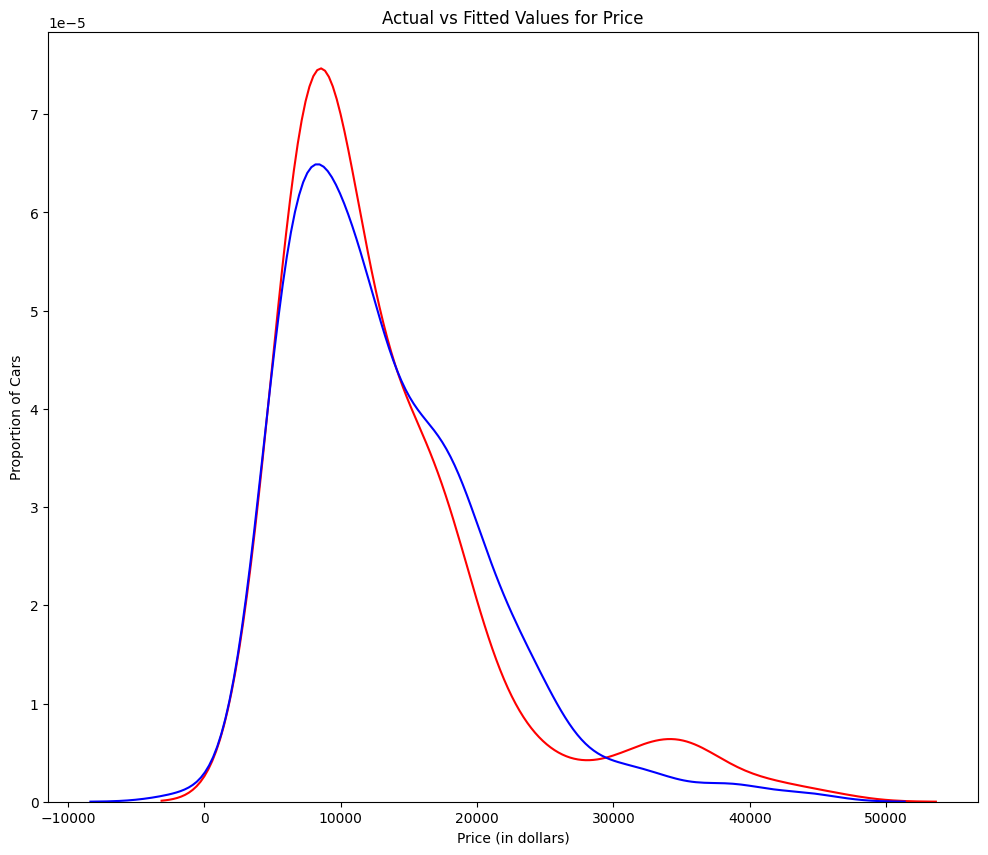

In [128]:
""" model evaluation """
import seaborn as sns
import matplotlib.pyplot as plt
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()



the distribution plot shows that the fitted values are reasonably close to the actual values since the two distributions overlap a bit
